## Рубежный контроль №2 по курсу ТМО
### Выполнила студентка группы РТ5-61Б Голубкова София
### Вариант №4

*Задача №2* Кластеризуйте данные с помощью двух алгоритмов кластеризации: MeanShift и DBSCAN. 
Сравните качество кластеризации с помощью следующих метрик качества кластеризации (если это возможно для Вашего набора данных):
* Adjusted Rand index
* Adjusted Mutual Information
* Homogeneity, completeness, V-measure
* Коэффициент силуэта

Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

**1. Загрузка и обработка данных**

In [85]:
data = pd.read_csv('../datasets/toy_dataset.csv', sep=",")
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [86]:
# размер датасета 150000 строк и 6 столбцов
data.shape

(150000, 6)

In [87]:
# проверим есть ли пропущенные значения - все колонки заполнены
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

**Кодирование категориальных признаков:**

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()
# проведем кодирование целочисленными значениями для колонки "Illness"
illness_enc_le = le.fit_transform(data['Illness'])

In [90]:
# кодирование для колонки "City"
city_enc_le = le.fit_transform(data['City'])

In [91]:
# кодирование для колонки "Gender"
gender_enc_le = le.fit_transform(data['Gender'])

In [92]:
data['city_enc_le'] = city_enc_le

In [93]:
data['gender_enc_le'] = gender_enc_le

In [94]:
data['illness_enc_le'] = illness_enc_le

In [95]:
data.head()

,Number,City,Gender,Age,Income,Illness,city_enc_le,gender_enc_le,illness_enc_le
0,1,Dallas,Male,41,40367.0,No,2,1,0
1,2,Dallas,Male,54,45084.0,No,2,1,0
2,3,Dallas,Male,42,52483.0,No,2,1,0
3,4,Dallas,Male,40,40941.0,No,2,1,0
4,5,Dallas,Male,46,50289.0,No,2,1,0


**Выберем призанки "age" и "income" для задачи кластеризации**

Возьмем только 1500 строк датасета, чтобы избежать проблем с памятью и временем ожидания.

In [96]:
data = data[::100]
data.shape

(1500, 9)

Оставим нужные столбцы:

In [97]:
data_1 = data.drop(columns=['Number','City','Illness','Age','illness_enc_le','gender_enc_le','Gender'],axis=1)
data_1.head()

,Income,city_enc_le
0,40367.0,2
100,68275.0,2
200,47949.0,2
300,64976.0,2
400,39999.0,2


In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
# промасштабируем признаки
columns = data_1.columns
scaler = StandardScaler()
df = scaler.fit_transform(data_1)
data_1 = pd.DataFrame(df, columns=columns)
data_1.head()

,Income,city_enc_le
0,-2.014751,-0.873409
1,-0.906055,-0.873409
2,-1.713543,-0.873409
3,-1.037114,-0.873409
4,-2.029371,-0.873409


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


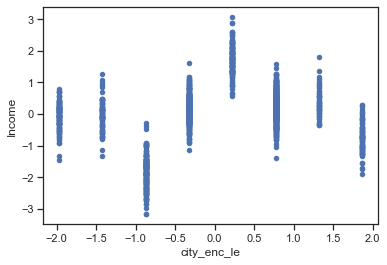

In [101]:
data_1.reset_index().plot.scatter(x='city_enc_le',y='Income')

**2. Алгоритмы кластеризации**

#### 2.1 MeanShift

In [102]:
from sklearn.cluster import MeanShift

In [106]:
%time result_MeanShift = MeanShift().fit_predict(data_1)

Wall time: 5.04 s


In [107]:
result_MeanShift

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

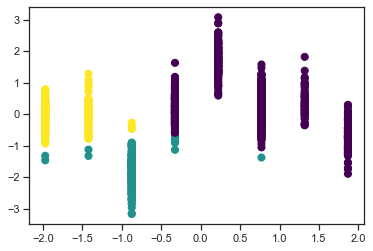

In [109]:
plt.scatter(data_1.iloc[:,1],data_1.iloc[:,0],c=result_MeanShift,s=50,cmap='viridis')

#### 2.2 DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

In [110]:
%time result_DBSCAN= DBSCAN().fit_predict(data_1)

Wall time: 22.9 ms


In [111]:
result_DBSCAN

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

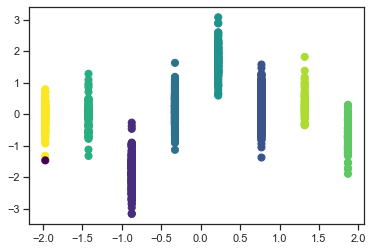

In [113]:
plt.scatter(data_1.iloc[:,1],data_1.iloc[:,0],c=result_DBSCAN,s=50,cmap='viridis')

### Сравнение метрик качества 
*Коэфициент силуэта:*

In [114]:
from sklearn.metrics import silhouette_score

In [118]:
(silhouette_score(data_1,result_MeanShift),silhouette_score(data_1,result_DBSCAN))

(0.5157760083516649, 0.4774363048200897)

In [124]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure

*Adjusted_rand_score:*

In [126]:
true_y = data_1['city_enc_le']
(adjusted_rand_score(true_y,result_MeanShift),adjusted_rand_score(true_y,result_DBSCAN))

(0.30732359077099786, 0.9996608930696685)

*Adjusted_mutual_info_score:*

In [128]:
(adjusted_mutual_info_score(true_y, result_MeanShift),adjusted_mutual_info_score(true_y, result_DBSCAN))

(0.5537481497501154, 0.9989290104023825)

*Homogeneity,completeness, v_measure:*

In [129]:
(homogeneity_completeness_v_measure(true_y, result_MeanShift),homogeneity_completeness_v_measure(true_y, result_MeanShift))

((0.39667065195761614, 0.9257410523312872, 0.5553706241123182),
 (1.0000000000000002, 0.997881522518725, 0.998939638082941))

### Выводы

Алгоритм кластеризации DBSCAN показал наилучшие результаты на выбранных данных. Он нашел 8 кластеров (в нашем наборе данных всего 8 городов) и сумел их верно интерпретировать, что наглядно видно на графике. Это так же подтверждают метрики качества, за исключением коэфициента силуэта - он показал, что качетсво DBSCAN несколько ниже, чем качество MeanShift.